In [6]:
import pandas as pd
# Load the data from the uploaded CSV file
file_path = 'Data assessment_Telematics1.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()

,Policy Number,Inception Date,Months since Inception,Gender,Age,Vehicle,Postcode,Premium Charged,Distance,Journeys,Overall Risk %,High Risk Event,High Risk Event%,Medium Risk Event,Medium Risk Event%,Speeding Events,SpeedingEventsPerMile,DriverScore
0,XQ22667078,15-03-2013,11,M,19,Renault,HD3 3NZ,3075.49,"4,905",794,3.15%,4,0.50%,21,2.64%,"1,400",0.29,92.22
1,XQ22667079,23-03-2013,11,M,19,VW,WN7 2LZ,2724.89,"1,134",146,0.68%,0,NaN,1,0.68%,96,0.08,97.71
2,XQ22667080,20-03-2013,11,M,21,Land Rover,NN17 5EG,1268.11,"4,794",831,11.31%,9,1.08%,85,10.23%,"1,746",0.36,87.91
3,XQ22667081,26-03-2013,11,M,18,Renault,B94 5BS,3088.35,"5,298",798,3.51%,5,0.63%,23,2.88%,"1,080",0.20,93.85
4,XQ22667082,03-04-2013,11,M,18,VW,NN18 9DJ,0.00,"5,847","1,679",1.31%,0,NaN,22,1.31%,"1,710",0.29,94.33


In [7]:
import matplotlib.pyplot as plt

# Convert relevant columns to numeric for analysis
data['Premium Charged'] = pd.to_numeric(data['Premium Charged'], errors='coerce')
data['Distance'] = pd.to_numeric(data['Distance'].str.replace(',', ''), errors='coerce')
data['DriverScore'] = pd.to_numeric(data['DriverScore'], errors='coerce')

# Clean and convert percentage columns
data['Overall Risk %'] = data['Overall Risk %'].str.replace('%', '').astype(float)
data['High Risk Event%'] = data['High Risk Event%'].str.replace('%', '').astype(float)
data['Medium Risk Event%'] = data['Medium Risk Event%'].str.replace('%', '').astype(float)
data['Speeding Events'] = pd.to_numeric(data['Speeding Events'].str.replace(',', ''), errors='coerce')


In [8]:
data.head()

,Policy Number,Inception Date,Months since Inception,Gender,Age,Vehicle,Postcode,Premium Charged,Distance,Journeys,Overall Risk %,High Risk Event,High Risk Event%,Medium Risk Event,Medium Risk Event%,Speeding Events,SpeedingEventsPerMile,DriverScore
0,XQ22667078,15-03-2013,11,M,19,Renault,HD3 3NZ,3075.49,4905,794,3.15,4,0.50,21,2.64,1400,0.29,92.22
1,XQ22667079,23-03-2013,11,M,19,VW,WN7 2LZ,2724.89,1134,146,0.68,0,NaN,1,0.68,96,0.08,97.71
2,XQ22667080,20-03-2013,11,M,21,Land Rover,NN17 5EG,1268.11,4794,831,11.31,9,1.08,85,10.23,1746,0.36,87.91
3,XQ22667081,26-03-2013,11,M,18,Renault,B94 5BS,3088.35,5298,798,3.51,5,0.63,23,2.88,1080,0.20,93.85
4,XQ22667082,03-04-2013,11,M,18,VW,NN18 9DJ,0.00,5847,"1,679",1.31,0,NaN,22,1.31,1710,0.29,94.33


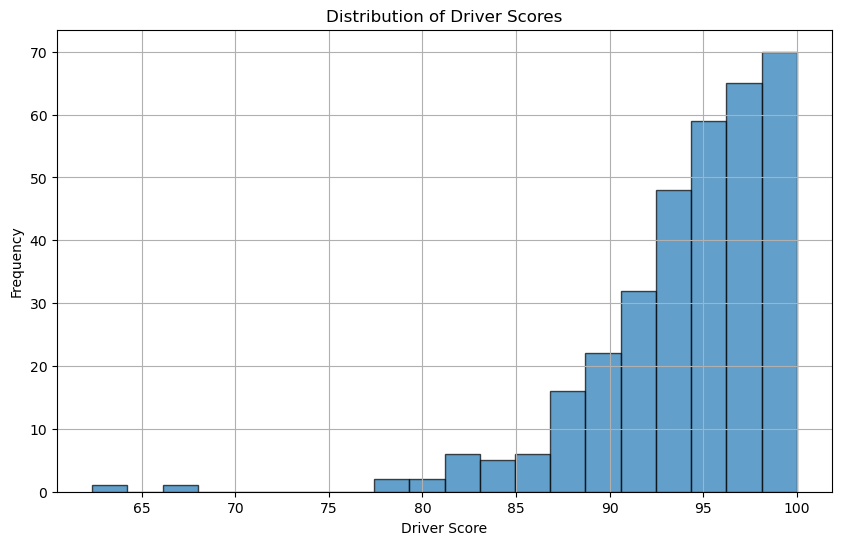

In [28]:
# 1. Distribution of Driver Scores
plt.figure(figsize=(10, 6))
plt.hist(data['DriverScore'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Driver Scores')
plt.xlabel('Driver Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Explanation:
# The distribution of driver scores shows that the majority of drivers have scores between 92 and 98, indicating a generally high level of safe driving. This helps in identifying the overall risk profile of the insured drivers.


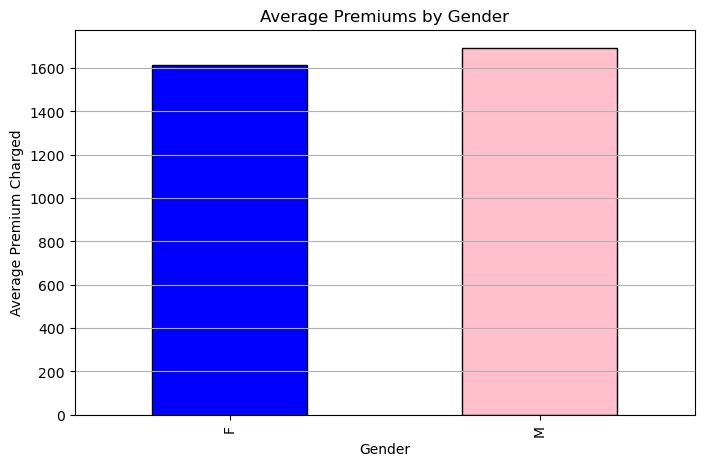

In [17]:
# 2. Average Premiums by Gender
avg_premiums_by_gender = data.groupby('Gender')['Premium Charged'].mean()
avg_premiums_by_gender.plot(kind='bar', figsize=(8, 5), color=['blue', 'pink'], edgecolor='k')
plt.title('Average Premiums by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Premium Charged')
plt.grid(axis='y')
plt.show()

# Explanation:
# Male drivers have a slightly higher average premium compared to female drivers, suggesting that male drivers might be considered higher risk. This insight can help insurers in adjusting premiums based on gender-related risk factors.


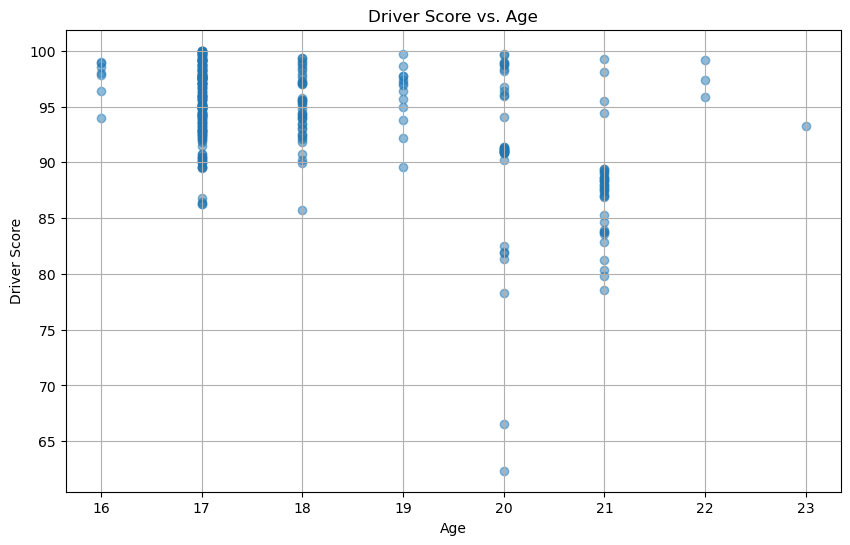

In [18]:
# 3. Driver Score vs. Age
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['DriverScore'], alpha=0.5)
plt.title('Driver Score vs. Age')
plt.xlabel('Age')
plt.ylabel('Driver Score')
plt.grid(True)
plt.show()

# Explanation:
# There is a moderate negative correlation between age and driver score, indicating that younger drivers tend to have lower scores. Insurers can use this information to adjust premiums for different age groups, with younger drivers potentially facing higher premiums due to higher risk.


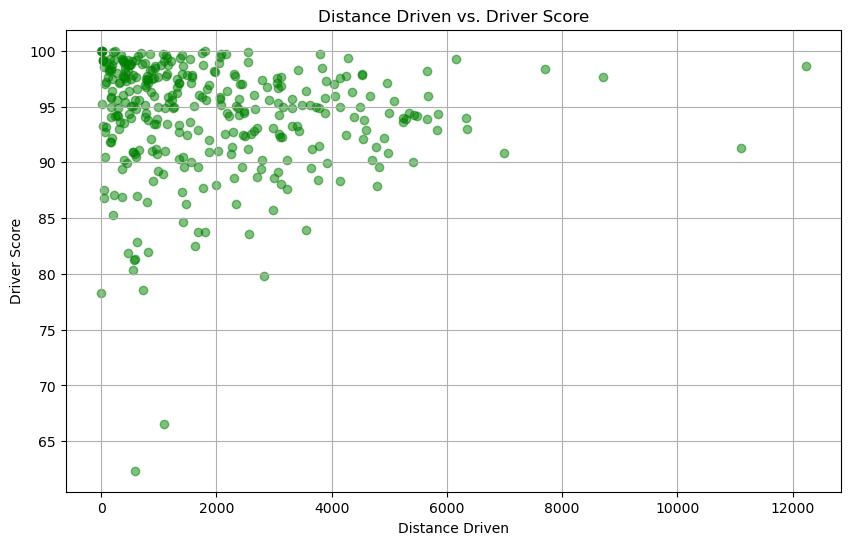

In [19]:
# 4. Distance Driven vs. Driver Score
plt.figure(figsize=(10, 6))
plt.scatter(data['Distance'], data['DriverScore'], alpha=0.5, color='green')
plt.title('Distance Driven vs. Driver Score')
plt.xlabel('Distance Driven')
plt.ylabel('Driver Score')
plt.grid(True)
plt.show()

# Explanation:
# Analyzing the relationship between distance driven and driver score can help determine if higher mileage is associated with better or worse driving scores. This can inform mileage-based insurance products and pricing strategies.


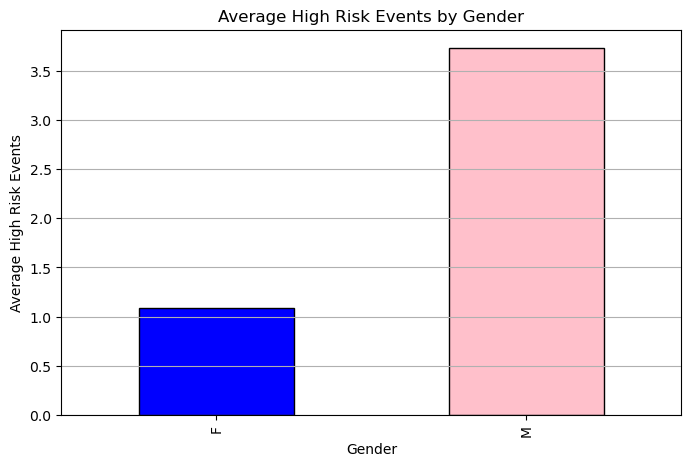

In [20]:
# 5. High-Risk Events by Gender
high_risk_events_by_gender = data.groupby('Gender')['High Risk Event'].mean()
high_risk_events_by_gender.plot(kind='bar', figsize=(8, 5), color=['blue', 'pink'], edgecolor='k')
plt.title('Average High Risk Events by Gender')
plt.xlabel('Gender')
plt.ylabel('Average High Risk Events')
plt.grid(axis='y')
plt.show()

# Explanation:
# The comparison of high-risk events by gender can reveal if one gender is more prone to high-risk driving behavior. This insight is useful for tailoring risk assessment and premium pricing based on gender.


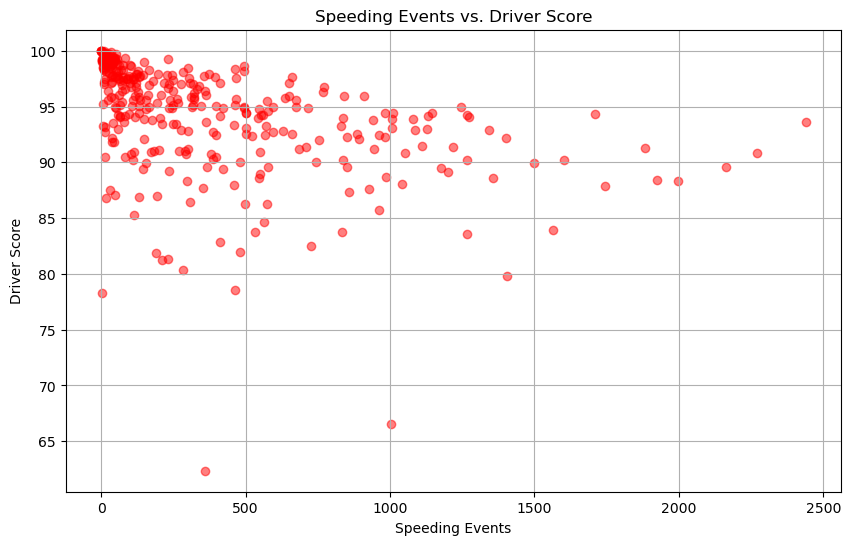

In [21]:
# 6. Speeding Events vs. Driver Score
plt.figure(figsize=(10, 6))
plt.scatter(data['Speeding Events'], data['DriverScore'], alpha=0.5, color='red')
plt.title('Speeding Events vs. Driver Score')
plt.xlabel('Speeding Events')
plt.ylabel('Driver Score')
plt.grid(True)
plt.show()

# Explanation:
# Exploring the correlation between the number of speeding events and the driver score can help determine if drivers with more speeding events have significantly lower scores. This can impact underwriting criteria and risk assessment.


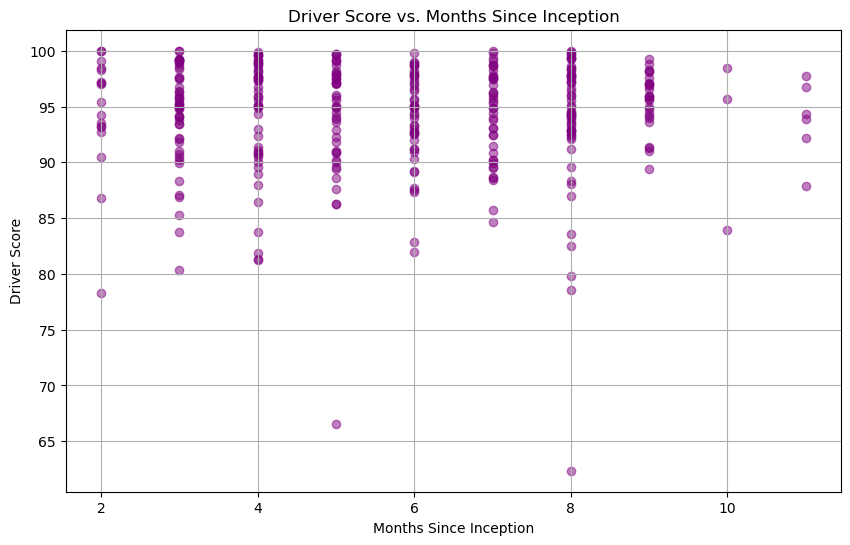

In [22]:
# 7. Driver Score vs. Months Since Inception
plt.figure(figsize=(10, 6))
plt.scatter(data['Months since Inception'], data['DriverScore'], alpha=0.5, color='purple')
plt.title('Driver Score vs. Months Since Inception')
plt.xlabel('Months Since Inception')
plt.ylabel('Driver Score')
plt.grid(True)
plt.show()

# Explanation:
# Examining the impact of the duration since policy inception on driver scores can help insurers understand if long-term policyholders demonstrate improved driving behavior. This can influence retention strategies and premium adjustments for long-term customers.
